In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

os.chdir('C:\\Users\\ianro\\OneDrive\\Documents\\Bootcamp\\UofU-VIRT-DATA-PT-10-2023-U-LOLC\\Group Project 1\\Bootcamp-Project-1\\Working Code\\Crime and Income Analysis')


In [3]:
income_by_state = pd.read_csv('income_by_state.csv', usecols=['Location', '2020', '2021', '2022'],  encoding='utf-8')
master_crimes_df = pd.read_csv('master_crime.csv',  encoding='utf-8')
data_types = {'Person Offenses 2020': int, 'Person Offenses 2021': int, 'Person Offenses 2022': int}



DataFrame Merge and Cleanup

In [4]:
crime_and_econ = pd.merge(income_by_state, master_crimes_df, on ='Location')

crime_and_econ.head()

,Location,2020,2021,2022,Person Offenses 2020,Person Offenses 2021,Person Offenses 2022,Property Offenses 2020,Property Offenses 2021,Property Offenses 2022,Society Offenses 2020,Society Offenses 2021,Society Offenses 2022
0,Alabama,230872566,252791890,258362172,4384,70855,76654,7981,122274,130599,3235,30075,49895
1,Arizona,374311796,409885700,430083534,18440,45372,58118,47284,104648,127557,18239,34213,45976
2,Arkansas,142111663,156361458,160254175,63893,66379,64358,135509,123785,119718,35720,38618,34483
3,Colorado,375157839,417967655,442213009,64221,70645,72319,257623,295735,284165,31282,34379,37505
4,Connecticut,278373604,292370938,300750748,27833,31205,31418,78197,84370,88162,10780,10693,10515


Crimes Against Persons

In [5]:
crime_and_econ['Median_Income'] = crime_and_econ[['2020', '2021', '2022']].median(axis=1)

crime_and_econ['Median_Income_Per_Billion'] = crime_and_econ['Median_Income'] / 1_000_000_000

crime_and_econ['Median_Crime_Rate'] = crime_and_econ[['Person Offenses 2020', 'Person Offenses 2021', 'Person Offenses 2022']].median(axis=1)

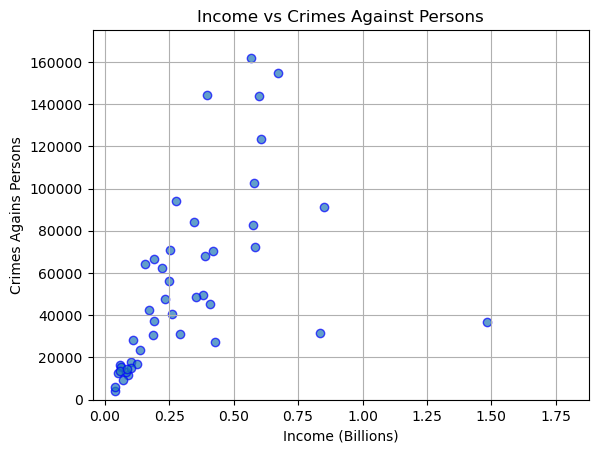

In [16]:
plt.scatter(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_Crime_Rate'], marker='o', edgecolor='blue', alpha=0.7)

plt.ylim(0,175000)
plt.xlabel('Income (Billions)')
plt.ylabel('Crimes Agains Persons')
plt.title('Income vs Crimes Against Persons')
plt.grid(True)

plt.show()

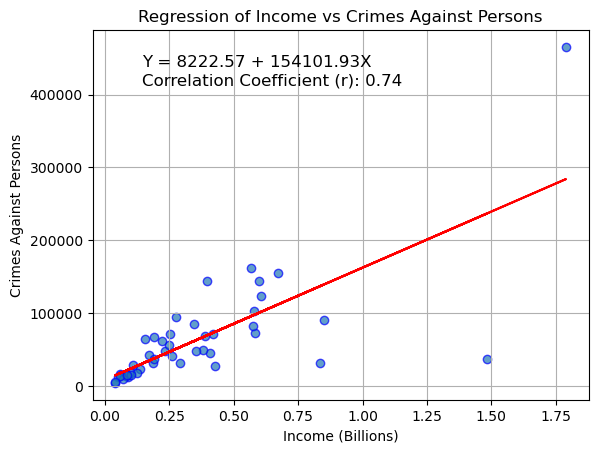

In [18]:
plt.scatter(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_Crime_Rate'], marker='o', edgecolor='blue', alpha=0.7)

slope, intercept, r_value, p_value, std_err = linregress(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_Crime_Rate'])
plt.plot(crime_and_econ['Median_Income_Per_Billion'], intercept + slope * crime_and_econ['Median_Income_Per_Billion'], 'r', label='Regression Line')

plt.xlabel('Income (Billions)')
plt.ylabel('Crimes Against Persons')
plt.title('Regression of Income vs Crimes Against Persons')
plt.grid(True)

equation = f'Y = {intercept:.2f} + {slope:.2f}X'
correlation = f'Correlation Coefficient (r): {r_value:.2f}'
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes, fontsize=12)

plt.show()

Crimes Against Property

In [20]:
crime_and_econ['Median_Income'] = crime_and_econ[['2020', '2021', '2022']].median(axis=1)
crime_and_econ['Median_PropertyCrime_Rate'] = crime_and_econ[['Property Offenses 2020', 'Property Offenses 2021', 'Property Offenses 2022']].median(axis=1)

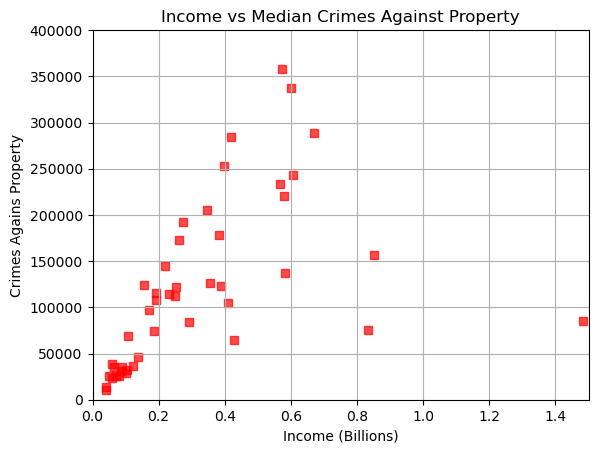

In [26]:
plt.scatter(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_PropertyCrime_Rate'], marker='s', color='red', alpha=0.7)

plt.ylim(0,400000)
plt.xlim(0, 1.5)
plt.xlabel('Income (Billions)')
plt.ylabel('Crimes Agains Property')
plt.title('Income vs Crimes Against Property')
plt.grid(True)

plt.show()

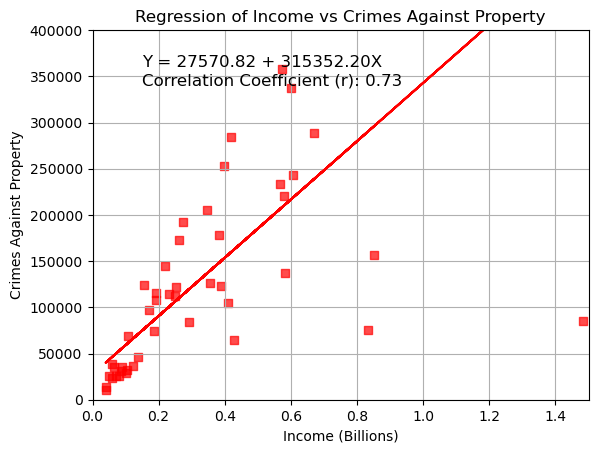

In [27]:
plt.scatter(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_PropertyCrime_Rate'], marker='s', color='red', alpha=0.7)

slope, intercept, r_value, p_value, std_err = linregress(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_PropertyCrime_Rate'])
plt.plot(crime_and_econ['Median_Income_Per_Billion'], intercept + slope * crime_and_econ['Median_Income_Per_Billion'], 'r', label='Regression Line')

plt.ylim(0,400000)
plt.xlim(0, 1.5)
plt.xlabel('Income (Billions)')
plt.ylabel('Crimes Against Property')
plt.title('Regression of Income vs Crimes Against Property')
plt.grid(True)

equation = f'Y = {intercept:.2f} + {slope:.2f}X'
correlation = f'Correlation Coefficient (r): {r_value:.2f}'
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes, fontsize=12)

plt.show()

Crimes Against Society

In [33]:
crime_and_econ['Median_SocietyCrime_Rate'] = crime_and_econ[['Society Offenses 2020', 'Society Offenses 2021', 'Society Offenses 2022']].median(axis=1)

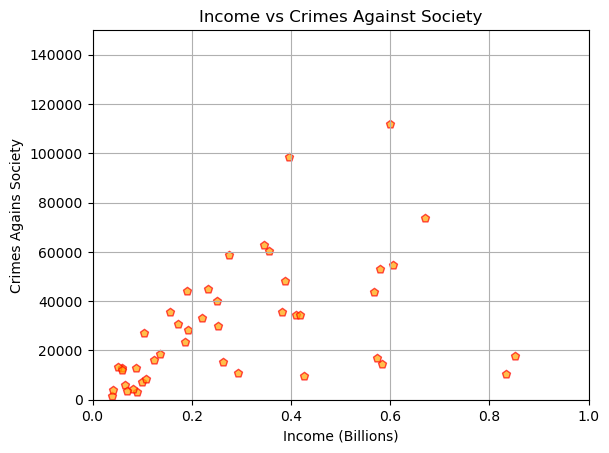

In [44]:
plt.scatter(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_SocietyCrime_Rate'], marker='p', color='orange', edgecolor='red', alpha=0.7)

plt.ylim(0,150000)
plt.xlim(0, 1)
plt.xlabel('Income (Billions)')
plt.ylabel('Crimes Agains Society')
plt.title('Income vs Crimes Against Society')
plt.grid(True)

plt.show()

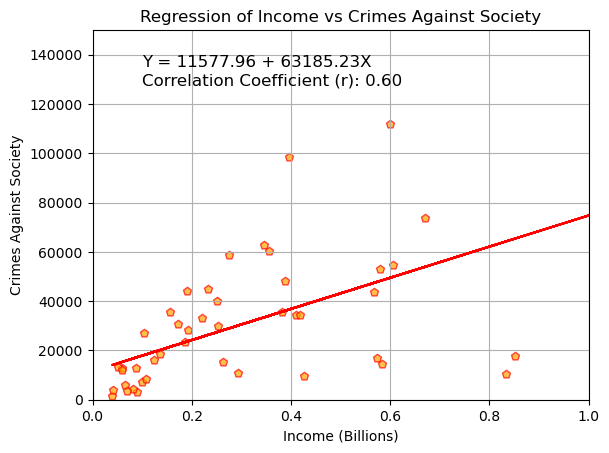

In [45]:
plt.scatter(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_SocietyCrime_Rate'], marker='p', color='orange', edgecolor='red', alpha=0.7)

slope, intercept, r_value, p_value, std_err = linregress(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_SocietyCrime_Rate'])
plt.plot(crime_and_econ['Median_Income_Per_Billion'], intercept + slope * crime_and_econ['Median_Income_Per_Billion'], 'r', label='Regression Line')

plt.ylim(0,150000)
plt.xlim(0, 1)
plt.xlabel('Income (Billions)')
plt.ylabel('Crimes Against Society')
plt.title('Regression of Income vs Crimes Against Society')
plt.grid(True)

equation = f'Y = {intercept:.2f} + {slope:.2f}X'
correlation = f'Correlation Coefficient (r): {r_value:.2f}'
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes, fontsize=12)

plt.show()

Total Crimes

In [40]:
crime_and_econ['Median_TotalCrime_Rate'] = crime_and_econ[['Person Offenses 2020', 'Person Offenses 2021', 'Person Offenses 2022', 'Property Offenses 2020', 'Property Offenses 2021', 'Property Offenses 2022', 'Society Offenses 2020', 'Society Offenses 2021', 'Society Offenses 2022']].median(axis=1)

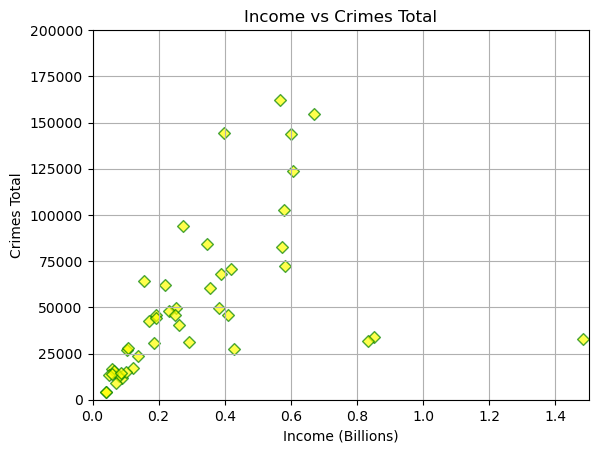

In [46]:
plt.scatter(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_TotalCrime_Rate'], marker='D', color='yellow', edgecolor='green', alpha=0.7)

plt.ylim(0,200000)
plt.xlim(0, 1.5)
plt.xlabel('Income (Billions)')
plt.ylabel('Crimes Total')
plt.title('Income vs Crimes Total')
plt.grid(True)

plt.show()

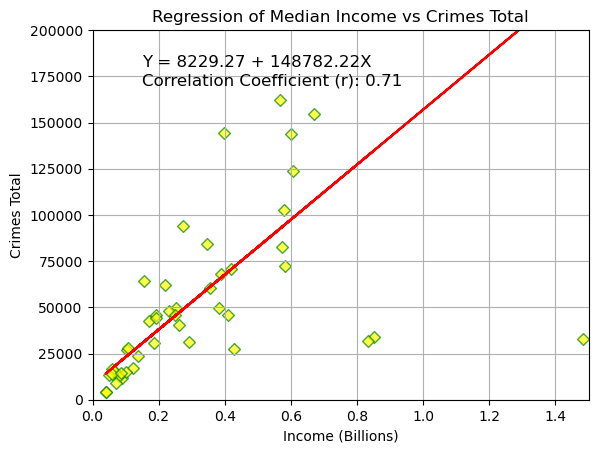

In [47]:
plt.scatter(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_TotalCrime_Rate'], marker='D', color='yellow', edgecolor='green', alpha=0.7)

slope, intercept, r_value, p_value, std_err = linregress(crime_and_econ['Median_Income_Per_Billion'], crime_and_econ['Median_TotalCrime_Rate'])
plt.plot(crime_and_econ['Median_Income_Per_Billion'], intercept + slope * crime_and_econ['Median_Income_Per_Billion'], 'r', label='Regression Line')

plt.ylim(0,200000)
plt.xlim(0, 1.5)
plt.xlabel('Income (Billions)')
plt.ylabel('Crimes Total')
plt.title('Regression of Median Income vs Crimes Total')
plt.grid(True)

equation = f'Y = {intercept:.2f} + {slope:.2f}X'
correlation = f'Correlation Coefficient (r): {r_value:.2f}'
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes, fontsize=12)

plt.show()
